In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, vectorize, stencil

# 4.2 Expectation Value

In [132]:
exp = np.exp
step = 0.5

K = 10_000_000
dx_rand = np.random.rand(K)
metro_rand = np.random.rand(K)
accept = np.full(K, False)
x = np.full(K, np.nan)
x[0] = 0.0

for k in range(1, K):
    init = 0.5 * x[k - 1] ** 2  # 0.5⋅x²
    dx = (dx_rand[k] - 0.5) * step * 2.0  # ±step
    x[k] = x[k - 1] + dx  # new x
    fin = 0.5 * x[k] ** 2.0  # new 0.5⋅x²
    accept[k] = exp(init - fin) > metro_rand[k]  # metro test
    x[k] = x[k] if accept[k] else x[k - 1]

accept[1:].sum() / K


0.9008819

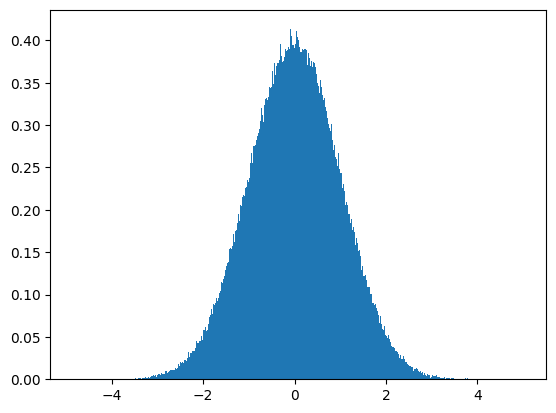

In [135]:
plt.hist(x, 10000, density=True);

In [143]:
@njit
def run(K=1_1000):
    step = 0.5

    dx_rand = np.random.rand(K)
    metro_rand = np.random.rand(K)
    accept = np.full(K, False)
    x = np.full(K, np.nan)
    x[0] = 0.0

    for k in range(1, K):
        init = 0.5 * x[k - 1] ** 2  # 0.5⋅x²
        dx = (dx_rand[k] - 0.5) * step * 2.0  # ±step
        x[k] = x[k - 1] + dx  # new x
        fin = 0.5 * x[k] ** 2.0  # new 0.5⋅x²
        accept[k] = exp(init - fin) > metro_rand[k]  # metro test
        x[k] = x[k] if accept[k] else x[k - 1]

    return x, accept[1:].sum() / K

run()

(array([ 0.        , -0.40608447, -0.41608325, ...,  0.78091158,
         0.58666312,  1.02234662]),
 0.9043636363636364)